     pothole_area_mm2  aspect_ratio  pothole_id  Bags used  dataset
0        15899.297424      1.910959        1189        0.50   train
1        17190.855381      2.444444        1522        0.50   train
2        93170.068027      0.897196        1975         NaN   train
3         8539.087372      1.305147         467        0.50   train
4        50348.953141      1.616000        1501        0.50   train
..                ...           ...         ...         ...     ...
884      13139.018692      1.269939        2004         NaN   valid
885       9403.102518      0.732218        1256        0.25   valid
886       2468.632496      0.950617        1034        0.50   valid
887       4481.298239      0.918919        1034        0.50   valid
888       6467.065868      1.296296          71        0.50   valid

[889 rows x 5 columns]


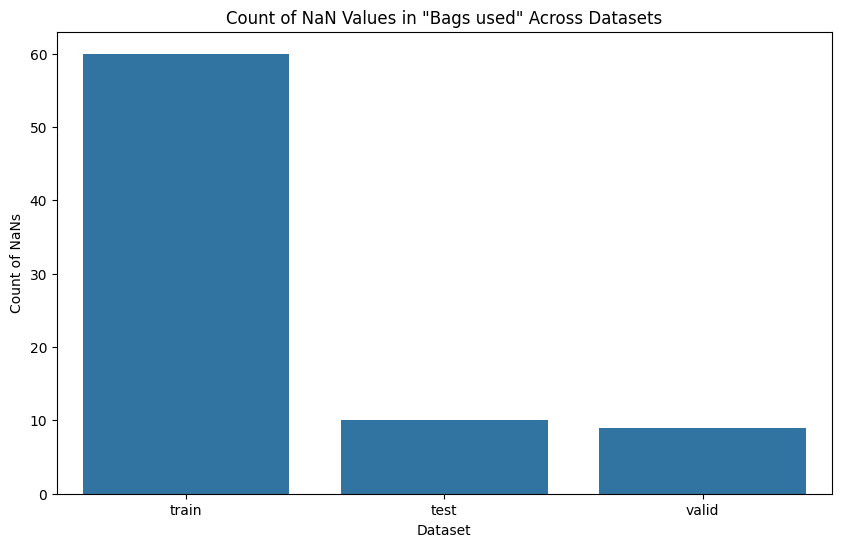

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('data-v6/train/train1.csv')
test_df = pd.read_csv('data-v6/test/test1.csv')
valid_df = pd.read_csv('data-v6/valid/valid1.csv')

# Add a column to indicate the source of each data
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'
valid_df['dataset'] = 'valid'

# Combine the datasets
combined_df = pd.concat([train_df, test_df, valid_df], ignore_index=True)
print(combined_df)
# Identify rows with NaN in "Bags used"
combined_df['NaN_Bags_used'] = combined_df['Bags used '].isna()

# Plot the count of NaN values in each dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='dataset', data=combined_df[combined_df['NaN_Bags_used']])
plt.title('Count of NaN Values in "Bags used" Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count of NaNs')
plt.show()


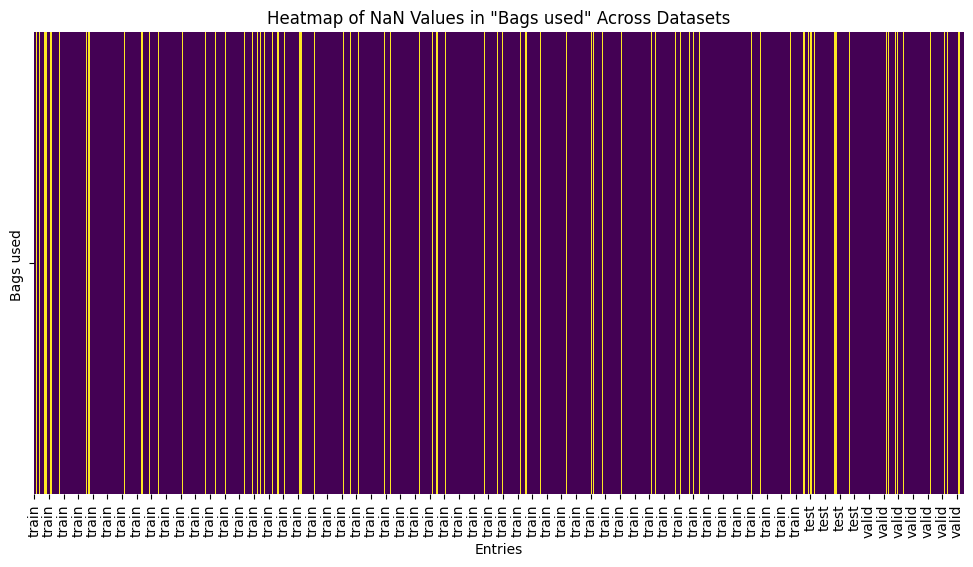

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('data-v6/train/train1.csv')
test_df = pd.read_csv('data-v6/test/test1.csv')
valid_df = pd.read_csv('data-v6/valid/valid1.csv')


# Add a column to indicate the source of each data
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'
valid_df['dataset'] = 'valid'

# Combine the datasets
combined_df = pd.concat([train_df, test_df, valid_df], ignore_index=True)

# Set the index to 'dataset' to plot against it
combined_df.set_index('dataset', inplace=True)

# Create a boolean DataFrame where True represents NaN in 'Bags used'
nan_map = combined_df[['Bags used ']].isnull()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(nan_map.T, cbar=False, cmap='viridis')
plt.title('Heatmap of NaN Values in "Bags used" Across Datasets')
plt.xlabel('Entries')
plt.show()
